### Dataset visualization

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from utils import *
import math
import scipy
import seaborn_image as isns

In [12]:
directory = "/media/madziegielewska/Seagate Expansion Drive/MAGISTERKA/diploma-project/Semantic-Segmentation/train_test_data"

In [13]:
# resize images
size_x = 384
size_y = 384

# number of classes for segmentation: background, needle, oocyte and spermatozoid
n_classes = 4

In [14]:
# read images and masks
train_list = read_image_files(f"{directory}/raw", size_x, size_y)
mask_list = read_image_files(f"{directory}/vis", size_x, size_y, interpolation=True)
vis_with_raw = read_image_files(f"{directory}/vis_with_raw", size_x, size_y)

print(len(train_list))
print(len(mask_list))

266
266


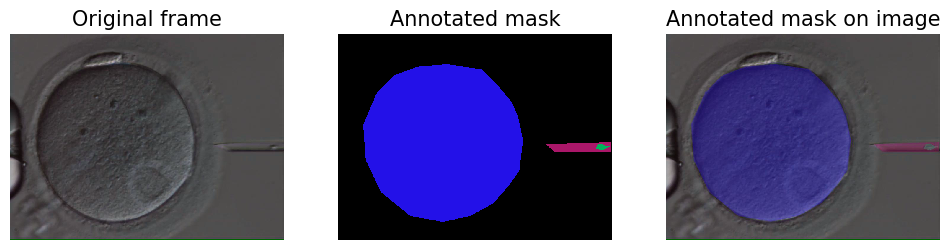

In [15]:
# n = np.random.randint(len(train_list)-1)
raw = cv2.imread(f"{directory}/raw/100_Trim1.mp4#t=4.6.jpg", 1)
vis = cv2.imread(f"{directory}/vis/100_Trim1.mp4#t=4.6.png", 1)
raw_Vis = cv2.imread(f"{directory}/vis_with_raw/100_Trim1.mp4#t=4.6.jpg", 1)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Original frame')

plt.imshow(raw, cmap='gray')
plt.axis('off')
plt.subplot(232)
plt.title('Annotated mask')
plt.imshow(vis, cmap='gray')
plt.axis('off')
plt.subplot(233)
plt.title('Annotated mask on image')
plt.imshow(raw_Vis, cmap='gray')
plt.axis('off')
plt.show()

In [16]:
# encode labels
labelencoder = LabelEncoder()
n, h, w = mask_list.shape

train_masks_reshaped = mask_list.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

print(np.unique(mask_list))
print(np.unique(train_masks_encoded_original_shape))

[  0  64  83 132]
[0 1 2 3]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_list, train_masks_encoded_original_shape, test_size = 0.1, random_state = 42)

print(len(X_train))
print(len(X_test))

239
27


In [18]:
print("Average pixels on train dataset")
get_average_pixels(y_train)
print()

print("Average pixels on test dataset")
get_average_pixels(y_test)

Average pixels on train dataset
Needle:  3226
Ooctye:  42215
Spermatozoid:  86
Background:  101929


Average pixels on test dataset
Needle:  3630
Ooctye:  37024
Spermatozoid:  84
Background:  106718



### After augmentation

In [19]:
augmented_images, augmented_masks = augment_data(X_train, y_train, size_x, size_y)

train_images = augmented_images
train_images = np.array(train_images)
print(len(train_images))

train_masks = augmented_masks
train_masks = np.array(train_masks)
print(len(train_masks))

1434
1434


In [20]:
print("Average pixels on train dataset")
get_average_pixels(y_train)
print()

print("Average pixels on test dataset")
get_average_pixels(y_test)

Average pixels on train dataset
Needle:  3226
Ooctye:  42215
Spermatozoid:  86
Background:  101929


Average pixels on test dataset
Needle:  3630
Ooctye:  37024
Spermatozoid:  84
Background:  106718



In [21]:
print("Average pixels on whole dataset")

weights = get_average_pixels(train_masks, return_weights=True)

print("Weights: ", weights)

Average pixels on whole dataset
Needle:  3218
Ooctye:  42238
Spermatozoid:  86
Background:  101914

Weights:  [8.42969502e-04 2.66986504e-02 2.03396165e-03 9.99641103e-01]


In [22]:
cm = 0.06*math.sqrt(1/(41641/math.pi))
print(f"1px = {round(cm,7)}cm")

1px = 0.0005212cm


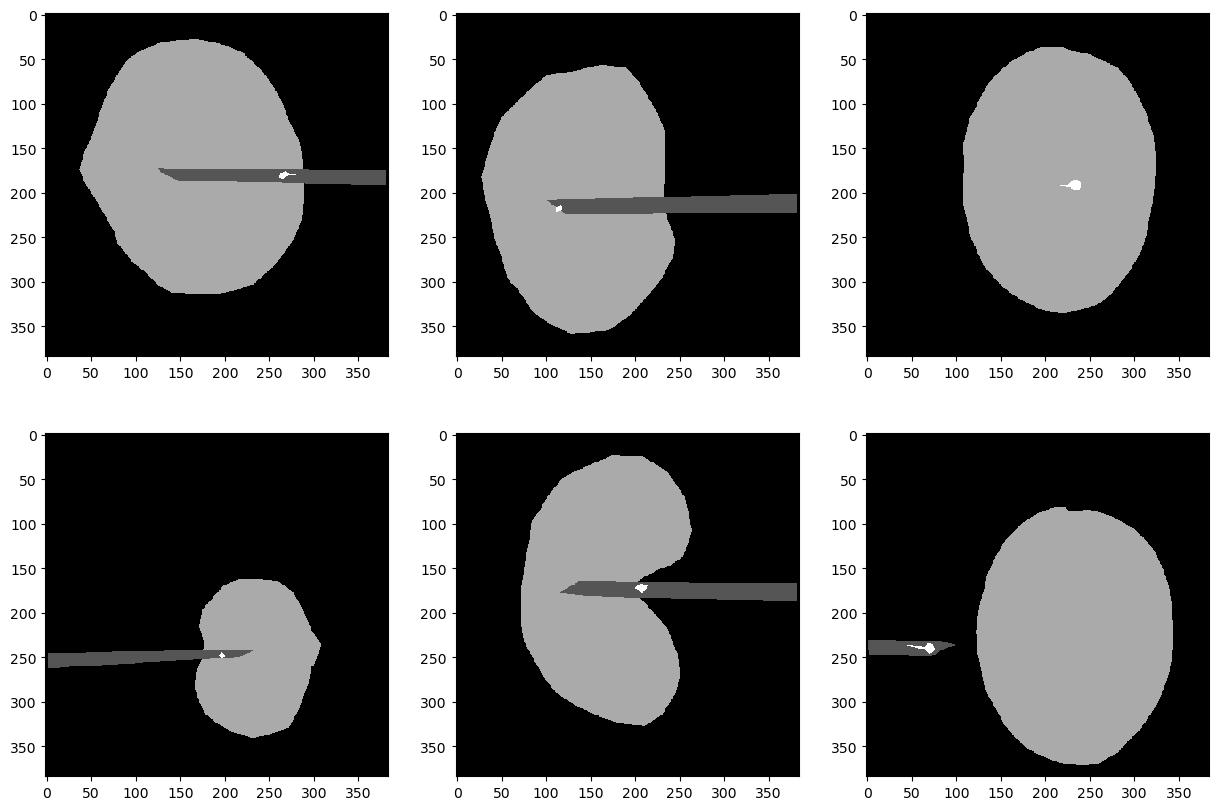

In [23]:
fig = plt.figure(figsize=(15,10))
columns = 3
rows = 2

for i in range(1, columns*rows+1):
    n = np.random.randint(len(train_masks))
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_masks[n], cmap='gray')
    
plt.show()

In [24]:
n = np.random.randint(len(y_train)-1)

img = y_train[n]
mask = y_train[n].astype(np.uint8)

needle_mask = y_train[n].astype(np.uint8)
needle_mask[needle_mask != 1] = 0

oocyte_mask = y_train[n].astype(np.uint8)
oocyte_mask[oocyte_mask != 2] = 0

spermatozoid_mask = y_train[n].astype(np.uint8)
spermatozoid_mask[spermatozoid_mask != 3] = 0

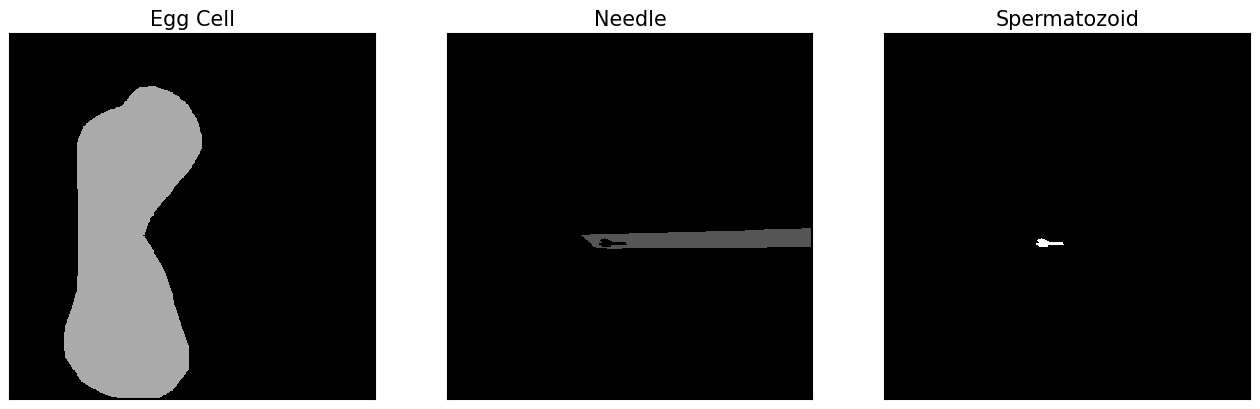

In [29]:
masks = [oocyte_mask, needle_mask, spermatozoid_mask]
classes = ['egg cell', 'needle', 'spermatozoid']

n = len(masks)
plt.figure(figsize=(16, 5))

for (i, mask) in enumerate(masks):
    plt.subplot(1, n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(' '.join(classes[i].split('_')).title())
    plt.imshow(mask, vmin=0, vmax=3, cmap='gray')

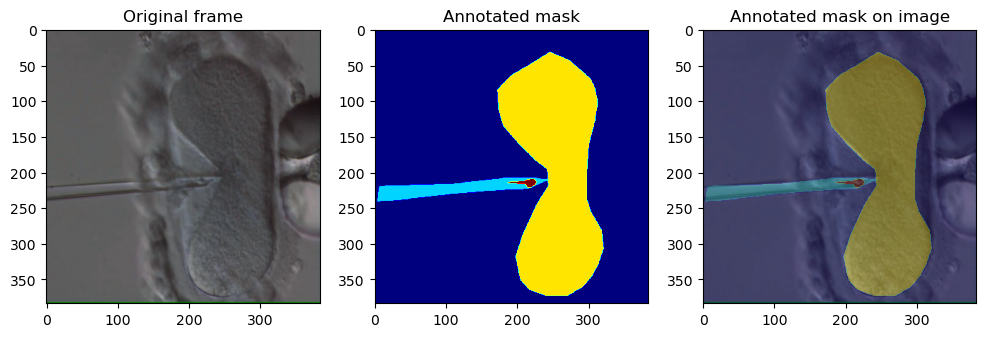

In [73]:
n = np.random.randint(len(y_train)-1)

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.title('Original frame')
plt.imshow(X_train[n], vmin=0, vmax=3, cmap='gray')
plt.subplot(232)
plt.title('Annotated mask')
plt.imshow(y_train[n], vmin=0, vmax=3, cmap='jet')
plt.subplot(233)
plt.title('Annotated mask on image')
plt.imshow(X_train[n], vmin=0, vmax=3, cmap='gray')
plt.imshow(y_train[n], vmin=0, vmax=3, cmap="jet", alpha=0.3)
plt.show()

In [55]:
print(np.average(X_train))
print(np.var(X_train))
print(np.min(X_train))
print(np.max(X_train))
print(scipy.stats.skew(X_train[120], axis=None))

107.91139350535241
2920.1841906689515
0
255
0.40161002909664295


No. of Obs. : 442368
Min. Value : 0
Max. Value : 255
Mean : 127.99034514250579
Variance : 1217.3672850011499
Skewness : 0.7155869657579935


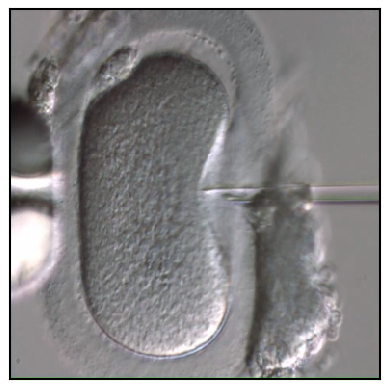

In [47]:
n = np.random.randint(len(X_train)-1)

ax = isns.imgplot(
    X_train[n],
    describe=True,
)

ax = isns.imgplot(X_train[n], dx=0.6, units="um")